In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import FixedLenFeature

In [4]:
featdef = {
    'train/image': FixedLenFeature(shape=[], dtype= tf.string),
    'train/label': FixedLenFeature(shape = [], dtype = tf.int64)
}

In [80]:
def _parse_record (example_proto, clip = False):
    ex = tf.parse_single_example(example_proto, featdef)
    
    im = tf.decode_raw(ex['train/image'], tf.uint8)
    im = tf.reshape(im, (28,28,3))
    im = tf.cast(im, tf.float32)*(1./255)
    
    label = (ex['train/label'])
    label = tf.one_hot(ex['train/label'], 2)
    print(label)
    print(im)
    return im, label
    

In [81]:
batch_size = 18
ds_train = tf.data.TFRecordDataset('/home/mudit/AI/TFrecord_Datasets/Melanoma_training_uint8.tfrecords').map(_parse_record)

ds_train = ds_train.repeat().batch(batch_size)


Tensor("ParseSingleExample/ParseSingleExample:1", shape=(), dtype=int64)
Tensor("mul:0", shape=(28, 28, 3), dtype=float32)


In [82]:
tensor = ds_train.make_one_shot_iterator().get_next()
with tf.Session() as session:
    print(session.run(tensor))


(array([[[[0.8588236 , 0.6156863 , 0.45098042],
         [0.85098046, 0.6117647 , 0.43529415],
         [0.8588236 , 0.6117647 , 0.43921572],
         ...,
         [0.86274517, 0.6       , 0.43137258],
         [0.8705883 , 0.63529414, 0.43921572],
         [0.8588236 , 0.6117647 , 0.43529415]],

        [[0.8352942 , 0.5882353 , 0.40000004],
         [0.8470589 , 0.61960787, 0.44705886],
         [0.86274517, 0.61960787, 0.43529415],
         ...,
         [0.86274517, 0.6313726 , 0.43137258],
         [0.8705883 , 0.6313726 , 0.45882356],
         [0.8235295 , 0.59607846, 0.43529415]],

        [[0.8431373 , 0.5764706 , 0.37647063],
         [0.82745105, 0.56078434, 0.36078432],
         [0.8588236 , 0.6       , 0.41176474],
         ...,
         [0.8588236 , 0.60784316, 0.427451  ],
         [0.86666673, 0.6039216 , 0.43529415],
         [0.86666673, 0.6117647 , 0.43921572]],

        ...,

        [[0.89019614, 0.627451  , 0.45882356],
         [0.8705883 , 0.6117647 , 0.43921572

In [67]:
IM_SIZE = 28

image_input = tf.keras.Input(shape = (IM_SIZE, IM_SIZE, 3), name = 'input_layer')

In [68]:
conv_1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3),
                              padding = 'same',
                              activation = 'relu')(image_input)

In [69]:
conv1 = tf.keras.layers.MaxPooling2D(padding = 'same')(conv_1)

In [70]:
conv_2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same',
                               activation = 'relu')(conv_1)

In [71]:
conv_flat = tf.keras.layers.Flatten()(conv_2)

In [72]:
fc_1 = tf.keras.layers.Dense(28,
                             activation='relu')(conv_flat)
fc_1 = tf.keras.layers.Dropout(0.2)(fc_1)
fc_2 = tf.keras.layers.Dense(28,
                             activation='relu')(fc_1)
fc_2 = tf.keras.layers.Dropout(0.4)(fc_2)

In [73]:
label_output = tf.keras.layers.Dense(2,
                                       activation='softmax',
                                       name='label')(fc_2)

In [74]:
model = tf.keras.Model(inputs = image_input, outputs = [label_output])

In [75]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 28)                702492    
_________________________________________________________________
dropout_4 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 28)                812       
__________

In [76]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [77]:
history = model.fit(ds_train, steps_per_epoch = 900, epochs = 5
                   )

Epoch 1/5
900/900 [==============================] - 51s 57ms/step - loss: 0.4990 - acc: 0.8091
Epoch 2/5
900/900 [==============================] - 51s 57ms/step - loss: 0.4578 - acc: 0.8168
Epoch 3/5
900/900 [==============================] - 51s 57ms/step - loss: 0.3884 - acc: 0.8275
Epoch 4/5
900/900 [==============================] - 50s 56ms/step - loss: 0.2951 - acc: 0.8499
Epoch 5/5
900/900 [==============================] - 52s 57ms/step - loss: 0.2049 - acc: 0.8919


In [78]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [79]:
model.predict(ds_train, steps =1)

array([[9.9998248e-01, 1.7547667e-05],
       [9.5324194e-01, 4.6758063e-02],
       [9.9979156e-01, 2.0841477e-04],
       [9.6155304e-01, 3.8447011e-02],
       [9.9176800e-01, 8.2319779e-03],
       [9.9999452e-01, 5.5397290e-06],
       [9.9712449e-01, 2.8754836e-03],
       [9.8089212e-01, 1.9107908e-02],
       [9.9028075e-01, 9.7192787e-03],
       [9.9954671e-01, 4.5322004e-04],
       [8.3438748e-01, 1.6561255e-01],
       [1.0000000e+00, 1.4516065e-08],
       [7.8595877e-01, 2.1404125e-01],
       [9.8079842e-01, 1.9201599e-02],
       [9.9190712e-01, 8.0928411e-03],
       [9.9989700e-01, 1.0297203e-04],
       [9.9101138e-01, 8.9885704e-03],
       [1.5509464e-02, 9.8449057e-01]], dtype=float32)

Text(0.5, 0, 'epoch')

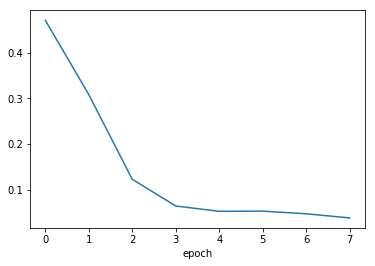

In [21]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

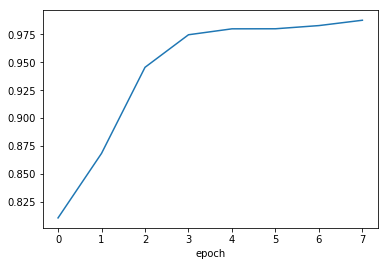

In [22]:
plt.plot(history.history['acc'])
plt.xlabel('epoch')